## Prepare a classification model using Naive Bayes for salary data 


In [1]:
#importing requried libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing dataset using pandas
Train=pd.read_csv('SalaryData_Train.csv')
Test=pd.read_csv('SalaryData_Test.csv')

## Performing EDA

In [3]:
#displaying  first 5 records 
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


In [5]:
#displaying last 5 records
Train.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
30160,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [6]:
Test.tail()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K
15059,35,Self-emp-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,60,United-States,>50K


In [7]:
#shape of dataset
Train.shape   

(30161, 14)

Dataset has `30161` rows and `14` columns

In [8]:
#shape of dataset
Test.shape 

(15060, 14)

Dataset has `15060` rows and `14` columns

In [9]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [10]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


<h4>The info() method prints information about the DataFrame. The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values). Note: the info() method actually prints the info.</h4>

In [11]:
Train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [12]:
Test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,15060.000000,15060.000000,15060.000000,15060.000000,15060.000000
mean,38.768327,10.112749,1120.301594,89.041899,40.951594
std,13.380676,2.558727,7703.181842,406.283245,12.062831
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


<h4>The describe() method returns description of the data in the DataFrame. If the DataFrame contains numerical data, the description contains these information for each column: count - The number of not-empty values. mean - The average (mean) value.</h4>

In [13]:
Train.ndim

2

In [14]:
Train.axes

[RangeIndex(start=0, stop=30161, step=1),
 Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
        'occupation', 'relationship', 'race', 'sex', 'capitalgain',
        'capitalloss', 'hoursperweek', 'native', 'Salary'],
       dtype='object')]

#### axes is a function of the matplotlib library that adds axes to the current graph and makes it as current axes.

In [15]:
#Checking for missing data
Train.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [16]:
#Checking for missing data
Test.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

#### Both the Train and Test dataset has no any NA values

In [17]:
#checking for duplication of data
Train[Train.duplicated()].shape

(3258, 14)

In [18]:
#displying duplicate values
Train[Train.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
326,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
364,27,Private,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,50,United-States,<=50K
518,24,Private,HS-grad,9,Never-married,Handlers-cleaners,Unmarried,Black,Female,0,0,40,United-States,<=50K
525,24,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
619,33,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30110,47,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
30118,20,Private,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
30132,22,Private,Some-college,10,Never-married,Adm-clerical,Own-child,White,Male,0,0,40,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K


In [19]:
#droping the duplicate rows
Train=Train.drop_duplicates()

In [20]:
#checking for duplication of data
Train[Train.duplicated()].shape

(0, 14)

#### Now there is no any duplicate values in Train dataset

In [21]:
#checking for duplication of data
Test[Test.duplicated()].shape

(930, 14)

In [22]:
#displying duplicate values
Test[Test.duplicated()]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
551,59,Private,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States,<=50K
601,32,Private,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,<=50K
681,40,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
799,24,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,35,United-States,<=50K
1044,44,Private,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,99999,0,60,United-States,>50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15043,51,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
15044,22,Private,Some-college,10,Never-married,Craft-repair,Own-child,White,Male,0,0,40,United-States,<=50K
15049,32,Private,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
15052,31,Private,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [23]:
#droping the duplicate rows
Test=Test.drop_duplicates()

In [24]:
#checking for duplication of data
Test[Test.duplicated()].shape

(0, 14)

#### Now there is no any duplicate values in Test dataset

In [25]:
#checking unique values
Train.nunique()

age               72
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      118
capitalloss       90
hoursperweek      94
native            40
Salary             2
dtype: int64

In [26]:
#checking unique values
Test.nunique()

age               73
workclass          7
education         16
educationno       16
maritalstatus      7
occupation        14
relationship       6
race               5
sex                2
capitalgain      110
capitalloss       79
hoursperweek      89
native            40
Salary             2
dtype: int64

In [27]:
Train.columns

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

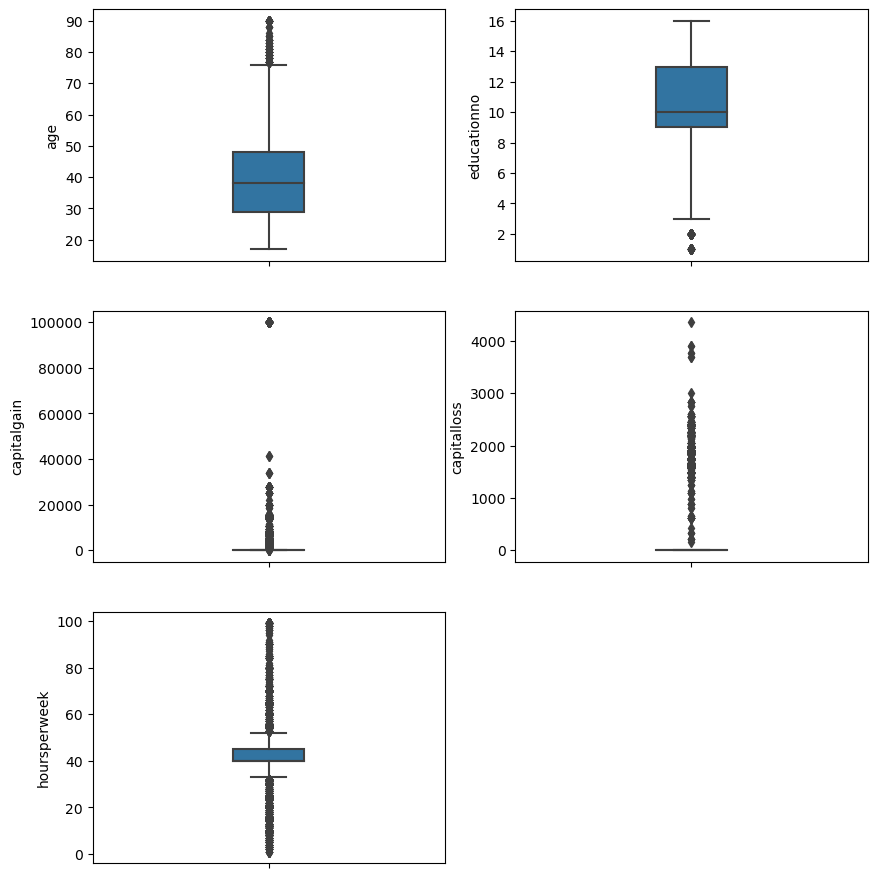

In [28]:
# Drawing boxplot for indepent variables with continuous values
cols = ['age','educationno', 'capitalgain','capitalloss', 'hoursperweek']

plt.figure(figsize=(10,15))
i=1
for col in cols:
    plt.subplot(4,2,i)
    sns.boxplot(y=col, data=Train,width=0.2)
    i+=1
plt.show()

<h4>Observations:</h4>
1. capitalgain has highest mean among the other continues independent variables<br>
2. educationno has lowest mean<br>
3. hoursperweek has high numbers of outliers

In [29]:
Train['Salary'].value_counts()

 <=50K    20023
 >50K      6880
Name: Salary, dtype: int64

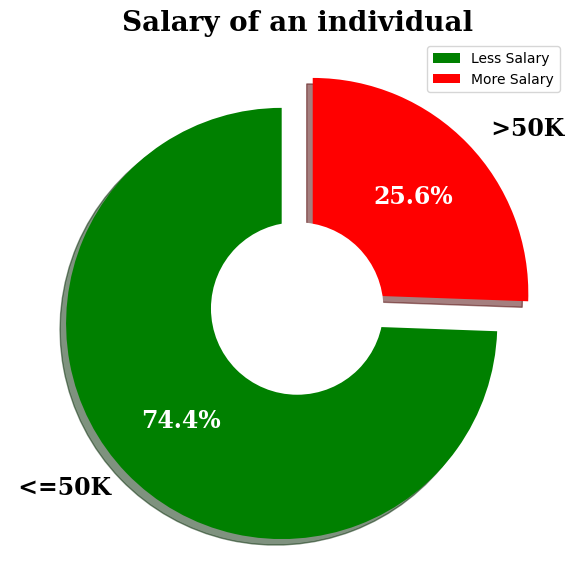

In [30]:
label_data=Train['Salary'].value_counts()

explode=(0.1,0.1)
plt.figure(figsize=(12,7))
patches, texts, pcts= plt.pie(label_data,labels=label_data.index,colors=['green','red'],pctdistance=0.65,shadow=True,
                             startangle=90,explode=explode,autopct='%1.1f%%',
                             textprops={'fontsize':17,'color':'black','weight':'bold','family':'serif'})
plt.setp(pcts,color='white')
hfont={'weight':'bold','family':'serif'}
plt.title('Salary of an individual',size=20,**hfont)

centre_circle=plt.Circle((0,0),0.40,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(['Less Salary','More Salary'],loc="upper right")
plt.show()

### We can see that the salary less than 50k are more in numbers than the individuals having more salary

In [31]:
Train['sex'].value_counts()

 Male      17961
 Female     8942
Name: sex, dtype: int64

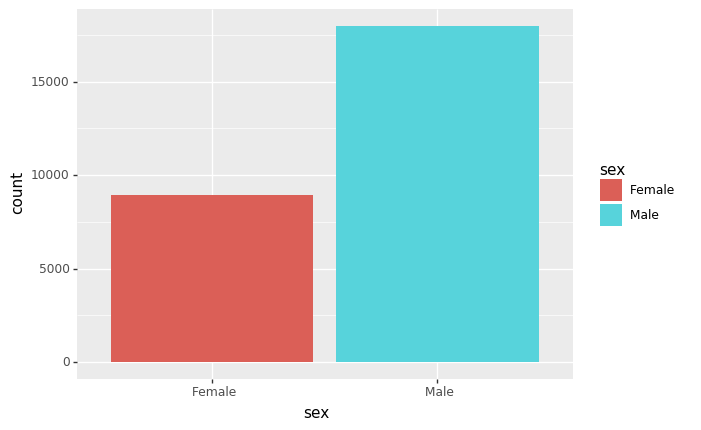

<ggplot: (142103190944)>

In [32]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(Train) + aes(x="sex",fill='sex') + geom_bar()

In [33]:
pd.crosstab(Train['occupation'],Train['Salary'])

Salary,<=50K,>50K
occupation,,
Adm-clerical,2816,475
Armed-Forces,8,1
Craft-repair,2472,757
Exec-managerial,1903,1743
Farming-fishing,843,114
Handlers-cleaners,1081,78
Machine-op-inspct,1442,223
Other-service,2782,132
Priv-house-serv,140,1


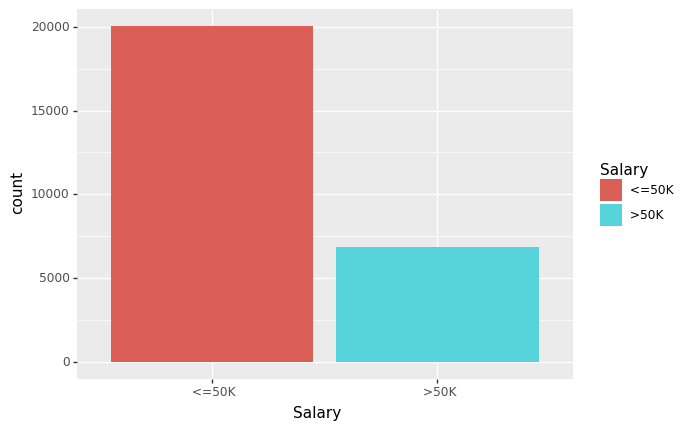

<ggplot: (142101034656)>

In [34]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(Train) + aes(x="Salary",fill='Salary') + geom_bar()

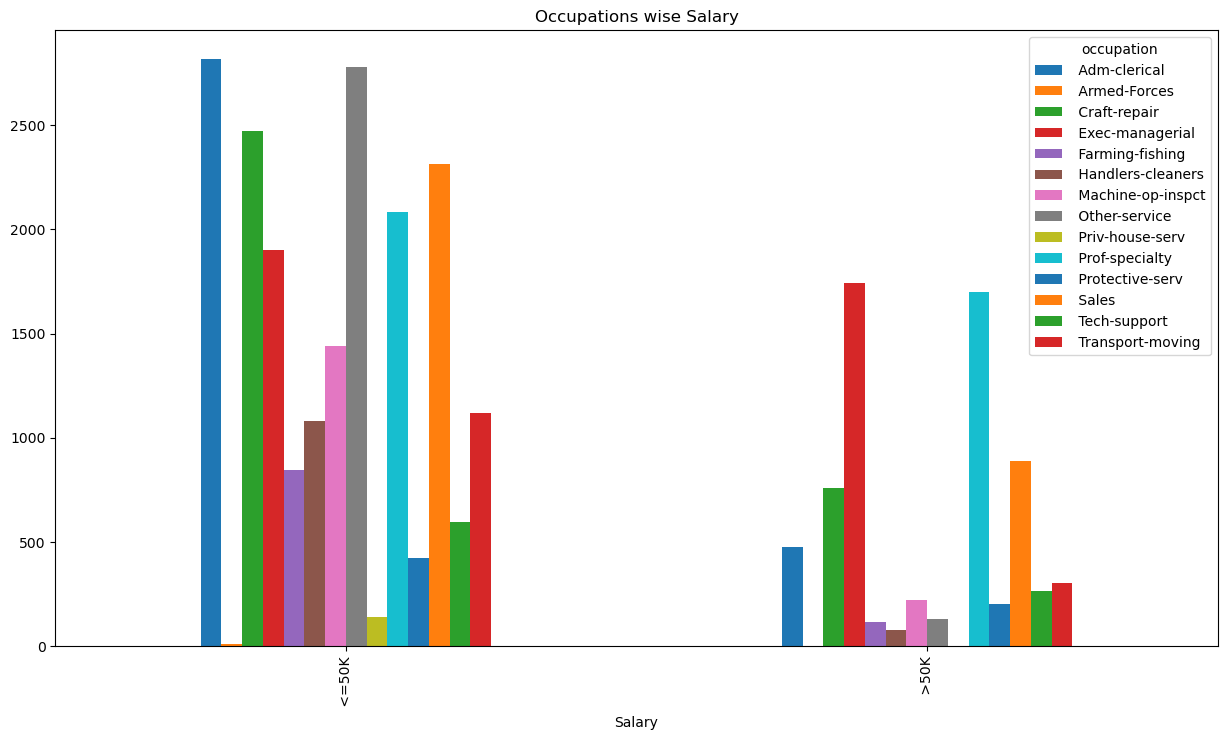

In [35]:
pd.crosstab(Train['Salary'], Train['occupation']).plot(kind="bar", figsize=(15, 8));
plt.title('Occupations wise Salary',)
plt.plot();

<h4>Observations:</h4>
1. Most of the individuals who are having salary less than 50k are doing Adm-clerical ocupation<br>
2. and most of the individuals who are having salary more than 50k are doing Exec-managerial ocupation<br>
3. Occupations like  Adm-clerical, Craft-repair, Armed-forces and Prof-specialty are higher in numbers those having salary less than 50k<br>
4. Occupations like Exec-managerial and Prof-specialty are higher in numbers those having salary more than 50k

In [36]:
pd.crosstab(Train['workclass'],Train['Salary'])

Salary,<=50K,>50K
workclass,,
Federal-gov,573,356
Local-gov,1421,593
Private,14902,4311
Self-emp-inc,466,583
Self-emp-not-inc,1733,698
State-gov,914,339
Without-pay,14,0


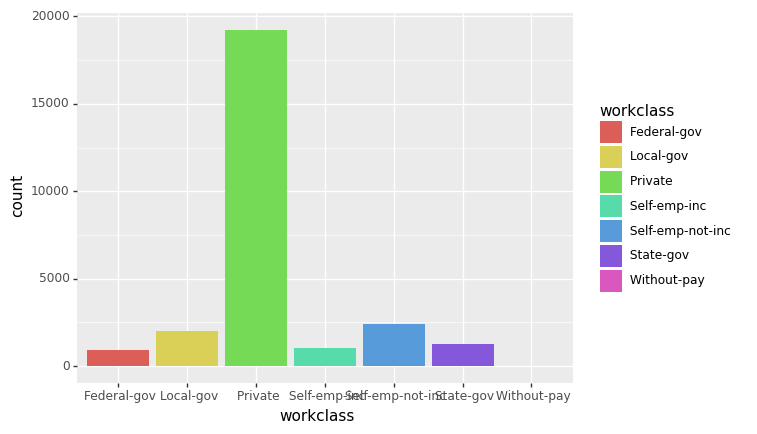

<ggplot: (142103319887)>

In [37]:
from plotnine.data import huron
from plotnine import ggplot, aes, stat_bin, geom_bar

ggplot(Train) + aes(x="workclass",fill='workclass') + geom_bar()

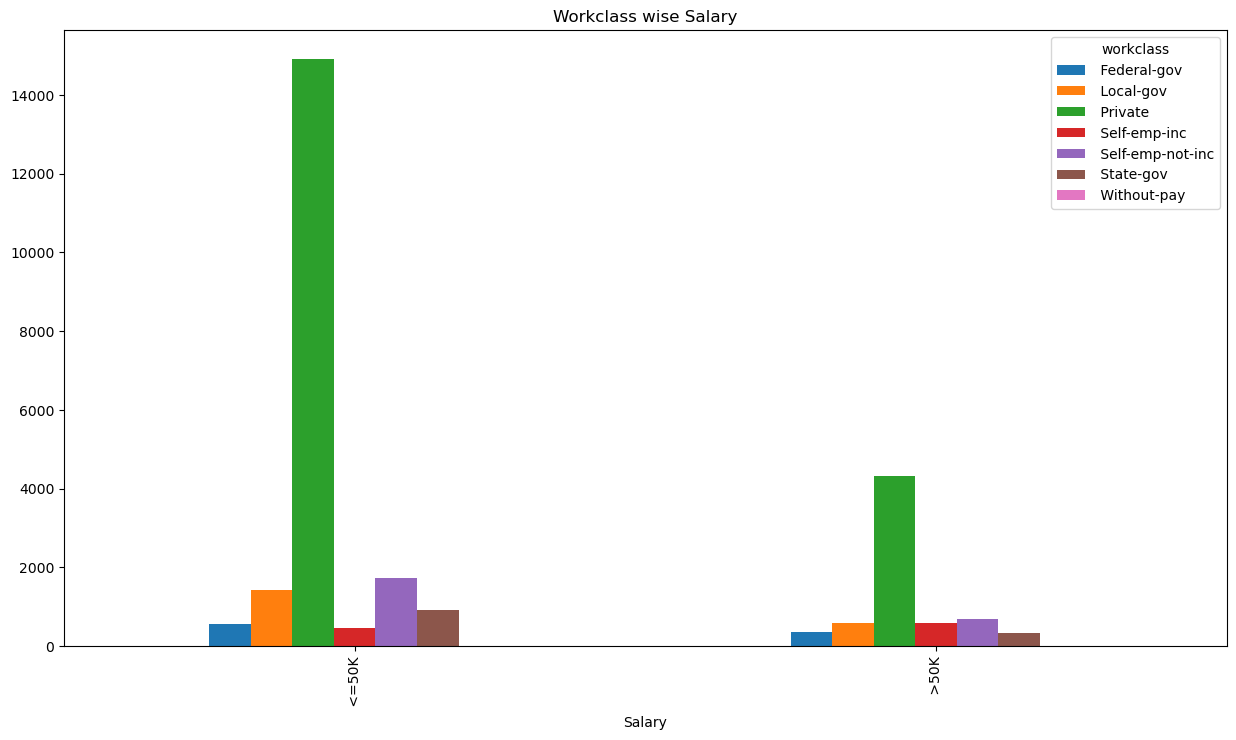

In [38]:
pd.crosstab(Train['Salary'], Train['workclass']).plot(kind="bar", figsize=(15, 8));
plt.title('Workclass wise Salary',)
plt.plot();

<h4>Observations:</h4>
The individual having workclass Private has high Salary compare to any other workclass<br>
The government should promote their wrokclass so more numbers of individuals will join them as gradually there will be an increment in the GDP in government sector

<AxesSubplot:xlabel='education'>

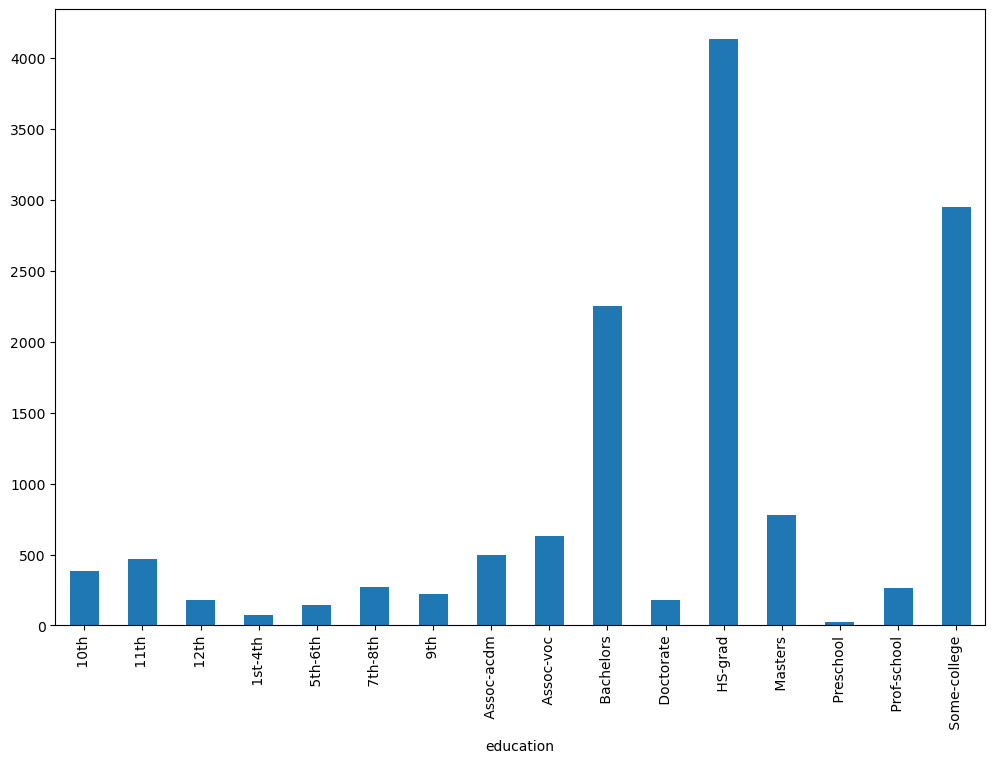

In [39]:
pd.crosstab(Train['Salary'],Train['education']).mean().plot(kind='bar',figsize=(12, 8))

<h4>Observations:</h4>
Individuals who are taking education as HS-grad has highest mean salary followed by some-college<br>
and the pre-school has lowest mean salary
The individuals who are taking education in Preschool,Prof-school,Doctorate has to be given some sholarhsips or internships facilities so there will increse in the salary ratio.

<AxesSubplot:xlabel='relationship'>

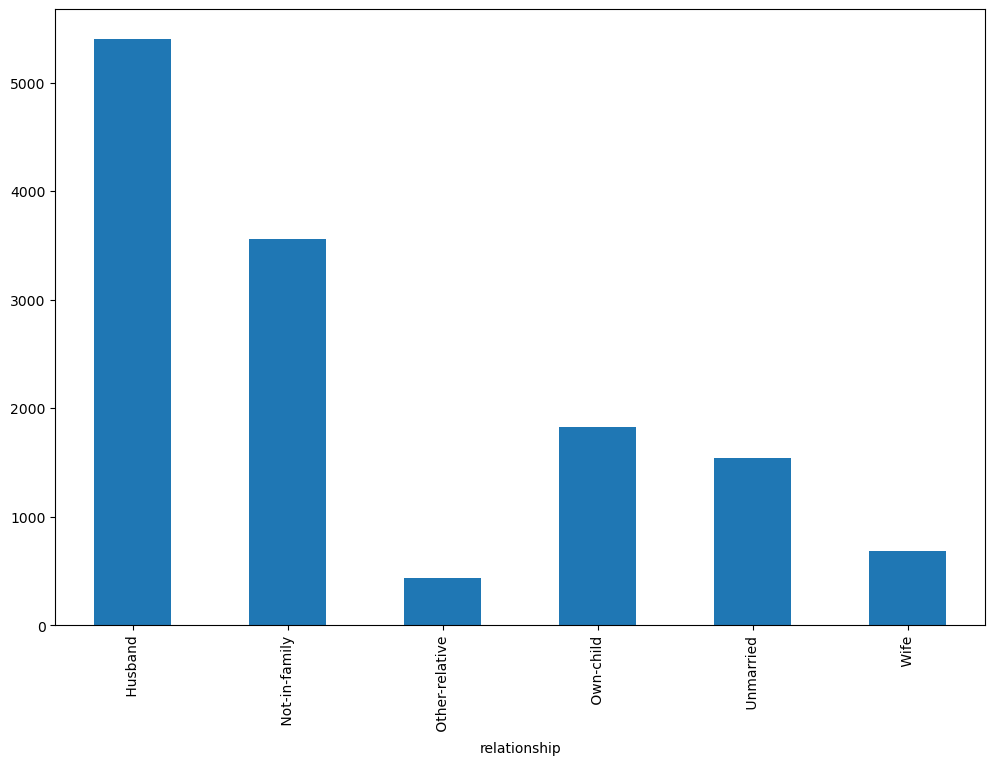

In [40]:
pd.crosstab(Train['Salary'],Train['relationship']).mean().plot(kind='bar',figsize=(12, 8))

<h4>Observations:</h4>
Male who are husband has highest mean salary<br>
while other relatives have low mean salary

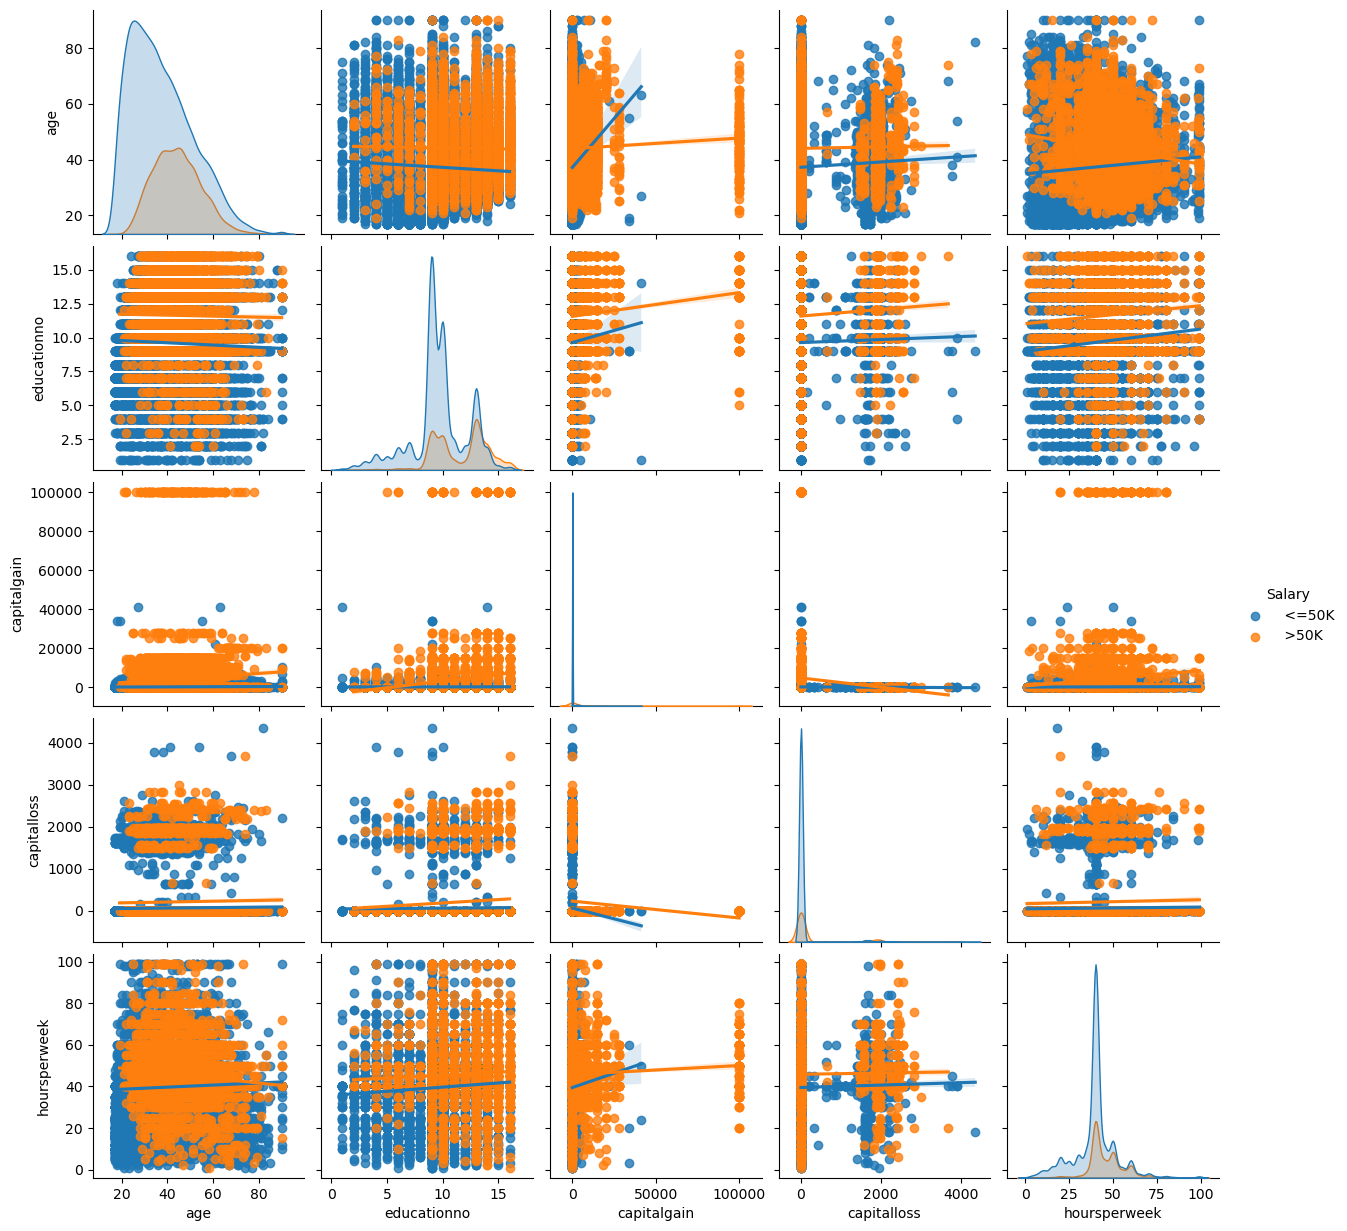

In [41]:
#displaying pairplot to check relationship
sns.pairplot(Train,hue='Salary',
             kind='reg',diag_kind='kde')
plt.show()

<h4>Observations:</h4>
By looking the above graph we can say that the independent varibles has no any reation with the dependend variable<br>
As the graphs are skewed 

In [42]:
cor = Train.corr()
cor

,age,educationno,capitalgain,capitalloss,hoursperweek
age,1.000000,0.038048,0.077235,0.052684,0.072529
educationno,0.038048,1.000000,0.126085,0.080025,0.145491
capitalgain,0.077235,0.126085,1.000000,-0.036023,0.079403
capitalloss,0.052684,0.080025,-0.036023,1.000000,0.049093
hoursperweek,0.072529,0.145491,0.079403,0.049093,1.000000


<h4>corr() is used to find the pairwise correlation of all columns in the Pandas Dataframe in Python. Any NaN values are automatically excluded. Any non-numeric data type or columns in the Dataframe, it is ignored.</h4>

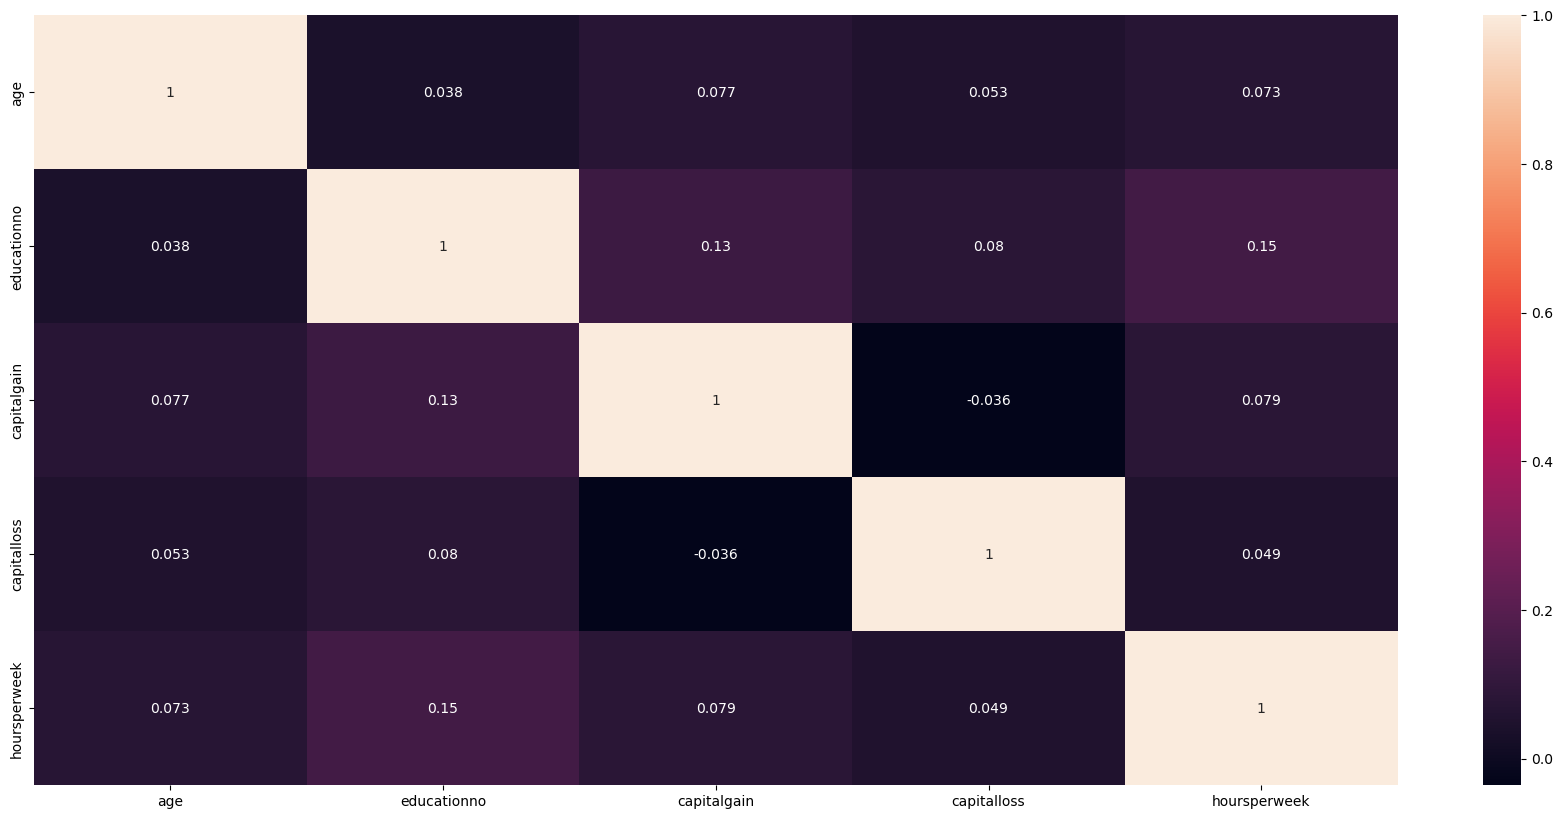

In [43]:
#checking corelation 
plt.figure(figsize=(22,10))
sns.heatmap(cor, annot=True,)
plt.show()

In [44]:
from sklearn.preprocessing import LabelEncoder

<h4>LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels. Fit label encoder. Fit label encoder and return encoded labels.</h4>

In [45]:
string_columns= ['workclass', 'education', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']

In [46]:
#Preprocessing the data. As, there are categorical variables
number = LabelEncoder()
for i in string_columns:
        Train[i]= number.fit_transform(Train[i])
        Test[i]=number.fit_transform(Test[i])

In [47]:
Train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0


In [48]:
Test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0


In [49]:
#Capturing the column names which can help in futher process
colnames = Train.columns
colnames

Index(['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native', 'Salary'],
      dtype='object')

In [50]:
len(colnames)

14

In [51]:
x_train = Train[colnames[0:13]]
y_train = Train[colnames[13]]
x_test = Test[colnames[0:13]]
y_test = Test[colnames[13]]

In [52]:
#Normalmization
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [53]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)

In [54]:
x_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.301370,0.833333,0.600000,0.800000,0.666667,0.000000,0.2,1.0,1.0,0.02174,0.0,0.397959,0.948718
1,0.452055,0.666667,0.600000,0.800000,0.333333,0.230769,0.0,1.0,1.0,0.00000,0.0,0.122449,0.948718
2,0.287671,0.333333,0.733333,0.533333,0.000000,0.384615,0.2,1.0,1.0,0.00000,0.0,0.397959,0.948718
3,0.493151,0.333333,0.066667,0.400000,0.333333,0.384615,0.0,0.5,1.0,0.00000,0.0,0.397959,0.948718
4,0.150685,0.333333,0.600000,0.800000,0.333333,0.692308,1.0,0.5,0.0,0.00000,0.0,0.397959,0.102564


In [55]:
x_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,0.109589,0.333333,0.066667,0.400000,0.666667,0.461538,0.6,0.5,1.0,0.000000,0.0,0.397959,0.948718
1,0.287671,0.333333,0.733333,0.533333,0.333333,0.307692,0.0,1.0,1.0,0.000000,0.0,0.500000,0.948718
2,0.150685,0.166667,0.466667,0.733333,0.333333,0.769231,0.0,1.0,1.0,0.000000,0.0,0.397959,0.948718
3,0.369863,0.333333,1.000000,0.600000,0.333333,0.461538,0.0,0.5,1.0,0.076881,0.0,0.397959,0.948718
4,0.232877,0.333333,0.000000,0.333333,0.666667,0.538462,0.2,1.0,1.0,0.000000,0.0,0.295918,0.948718


In [56]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_train, y_train, test_size = 0.3, random_state = 100)

In [57]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

### Naive Bayes classifier is successfully used in various applications such as spam filtering, text classification, sentiment analysis, and recommender systems. It uses Bayes theorem of probability for prediction of unknown class. In this tutorial, you are going to learn about all of the following: Classification Workflow.

In [58]:
# GaussianNB is one of naive bayes type among three (Bernoulli / Multinomial) 
# it is used when your databse is normal 

In [59]:
#fitting the model
model.fit(X_train,y_train)

GaussianNB()

In [60]:
model.score(X_test,y_test)

0.7940775616404411

In [61]:
y_test[0:10]

7826     0
13240    0
13127    0
29307    0
19774    0
6203     1
8513     1
24530    0
18777    0
932      0
Name: Salary, dtype: int32

In [62]:
#predicting validation data
y_pred_test=model.predict(X_test)

In [63]:
y_pred_test[0:10]

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [64]:
model.predict_proba(x_test[:10])

array([[9.99996099e-01, 3.90080500e-06],
       [9.07223974e-01, 9.27760259e-02],
       [9.48031747e-01, 5.19682534e-02],
       [7.35178920e-12, 1.00000000e+00],
       [9.99988613e-01, 1.13866448e-05],
       [2.27484583e-02, 9.77251542e-01],
       [9.99917274e-01, 8.27256982e-05],
       [9.99668217e-01, 3.31783037e-04],
       [1.94867533e-08, 9.99999981e-01],
       [8.11048392e-01, 1.88951608e-01]])

In [65]:
y_pred_train=model.predict(X_train)

## Checking for overfitting and underfitting

In [66]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.7959
Test set score: 0.7941


The training-set accuracy score is `0.7959` while the test-set accuracy to be `0.7941`. These two values are quite comparable. So, there is no sign of overfitting

### Confusion matrix

In [67]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[5662  301]
 [1361  747]]

True Positives(TP) =  5662

True Negatives(TN) =  747

False Positives(FP) =  301

False Negatives(FN) =  1361


<AxesSubplot:>

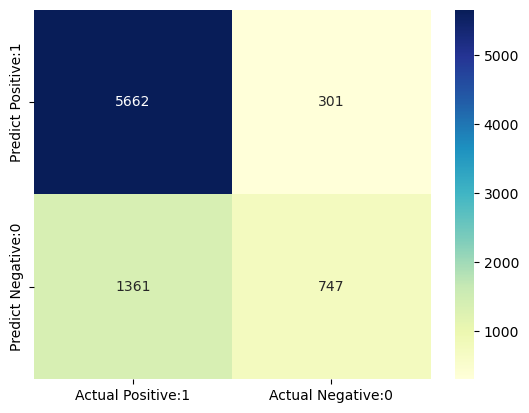

In [68]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

### Classification metrices

In [69]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.95      0.87      5963
           1       0.71      0.35      0.47      2108

    accuracy                           0.79      8071
   macro avg       0.76      0.65      0.67      8071
weighted avg       0.78      0.79      0.77      8071



### Classification accuracy

In [70]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

## Classification error

In [71]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2059


## Precision

In [72]:
# print precision score

precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9495


## Recall

In [73]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8062


In [74]:
true_positive_rate = TP / float(TP + FN)

print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8062


## ROC - AUC

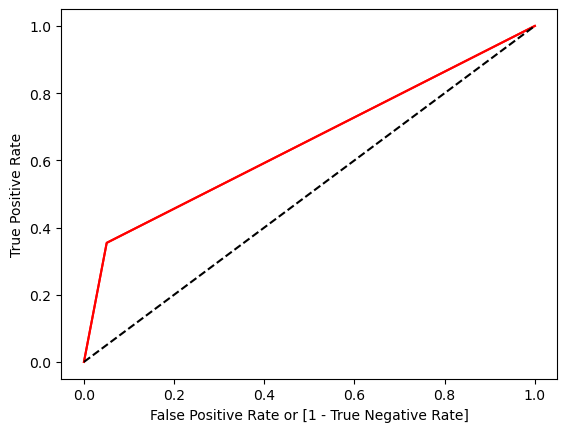

auc accuracy: 0.6519431895168848


In [75]:
# ROC Curve plotting and finding AUC value
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds=roc_curve(y_test,y_pred_test)
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_pred_test)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

In [76]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_test)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6519


## k-Fold Cross Validation

In [77]:
# Applying 10-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 10, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.79617834 0.79140127 0.80191184 0.80297398 0.79394583 0.78332448
 0.79925651 0.79660117 0.80403611 0.78810409]


In [78]:
# compute Average cross-validation score
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.7958


## SMOTE - Synthetic Minority Over-sampling Technique

In [79]:
from imblearn.over_sampling import SMOTE

In [81]:
sm=SMOTE(random_state=50)
x_res,y_res=sm.fit_resample(X_train,y_train)

In [82]:
model.fit(x_res,y_res)

GaussianNB()

In [83]:
y_res_pred=model.predict(X_test)

In [84]:
print(classification_report(y_test, y_res_pred))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      5963
           1       0.70      0.48      0.57      2108

    accuracy                           0.81      8071
   macro avg       0.77      0.70      0.72      8071
weighted avg       0.80      0.81      0.80      8071



In [86]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.8116
Test set score: 0.8092


The training-set accuracy score is `0.8116` while the test-set accuracy to be `0.8092`. These two values are quite comparable. So, there is no sign of overfitting

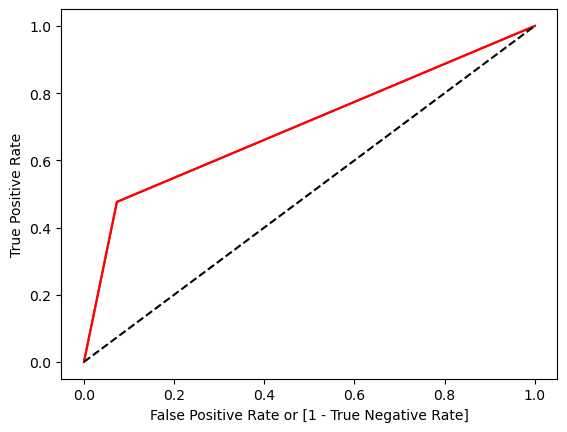

auc accuracy: 0.7015816383192878


In [89]:
# ROC Curve plotting and finding AUC value

fpr,tpr,thresholds=roc_curve(y_test,y_res_pred)
plt.plot(fpr,tpr,color='red')
auc=roc_auc_score(y_test,y_res_pred)

plt.plot(fpr,tpr,color='red',label='logit model(area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.show()

print('auc accuracy:',auc)

<h4>Insights:</h4>
We have build a classification model using Naive Bayes for salary data <br>
For that we have used GaussianNB() method because our dataset is in categorial<br>
The training-set accuracy score is 0.7959 while the test-set accuracy to be 0.7941. These two values are quite comparable. So, there is no sign of overfitting<br>
By using SMOTE we have balanced our data<br>
And we can getting the training-set accuracy score is 0.8116 while the test-set accuracy to be 0.8092<br>
So, the model is best fitting or Genrealized.